In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\Python\Project\video game sales\artifacts\vgsales_cleaned.csv")

In [3]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Performing data encoding

In [4]:
for col in data.select_dtypes(include='object').columns:
    print(f'{col}: {data[col].nunique()}')

Name: 11493
Platform: 31
Genre: 12
Publisher: 578


1) Label encoding needs to be performed or  
2) As the number of unique values are more in each column, encoding would lead to excessive dimensionality we can  group less frequent categories into a single "Other" category before encoding. This would reduce the number of unique categories and potentially mitigate dimensionality issues.

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [7]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,11101,6,2002.0,4,269,0.01,0.00,0.00,0.00,0.01
16594,5796,7,2003.0,8,241,0.01,0.00,0.00,0.00,0.01
16595,8144,16,2008.0,6,21,0.00,0.00,0.00,0.00,0.01
16596,5014,4,2010.0,5,8,0.00,0.01,0.00,0.00,0.01


In [8]:
corr_data = data.corr()

In [17]:
corr_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,1.000000,0.014418,-0.001251,-0.004989,0.026968,0.012277,0.006542,0.015945,-0.006785,0.010888
Platform,0.014418,1.000000,0.166057,0.029061,-0.012544,0.041536,0.047158,-0.078207,0.055061,0.028213
Year,-0.001251,0.166057,1.000000,-0.123861,0.029928,-0.091282,0.005824,-0.169432,0.040857,-0.074807
Genre,-0.004989,0.029061,-0.123861,1.000000,-0.050322,0.017435,0.016481,0.030085,0.009731,0.021671
Publisher,0.026968,-0.012544,0.029928,-0.050322,1.000000,0.003377,0.011835,0.051668,0.013616,0.017479
NA_Sales,0.012277,0.041536,-0.091282,0.017435,0.003377,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006542,0.047158,0.005824,0.016481,0.011835,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.015945,-0.078207,-0.169432,0.030085,0.051668,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.006785,0.055061,0.040857,0.009731,0.013616,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.010888,0.028213,-0.074807,0.021671,0.017479,0.941047,0.902836,0.611816,0.748331,1.000000


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

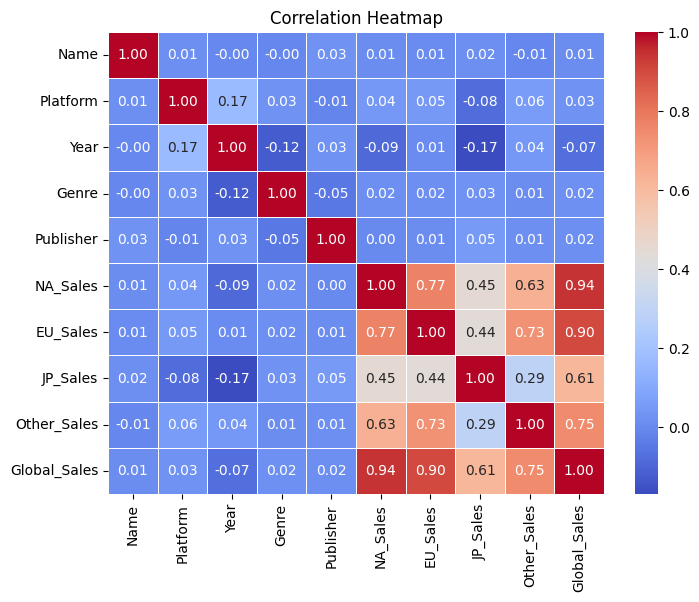

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Positive Correlation (Values closer to 1):**
- A positive correlation indicates that as one feature increases, the other feature also tends to increase.  

  - "NA_Sales" and "EU_Sales" have a high positive correlation coefficient of 0.77, suggesting that sales in North America are positively correlated with sales in Europe.
  - "Global_Sales" and "NA_Sales" also have a high positive correlation coefficient of 0.94, indicating a strong positive relationship between global sales and sales in North America.

**Negative Correlation (Values closer to -1):**
- A negative correlation indicates that as one feature increases, the other feature tends to decrease.  
  - "Year" and "JP_Sales" have a negative correlation coefficient of -0.17, suggesting that as the release year of a game increases, sales in Japan tend to decrease.

**Weak Correlation (Values closer to 0):**
- Correlation coefficients close to 0 indicate a weak linear relationship between features. 
  - "Publisher" and "Year" have a correlation coefficient of 0.03, suggesting a weak positive relationship between the publisher of a game and the release year.  





**Global Sales Correlation:**
- "Global_Sales" is the target variable representing the total worldwide sales of video games.
- Positive Correlation:
  - "NA_Sales" and "EU_Sales" have high positive correlation coefficients with "Global_Sales" (0.94 and 0.90 respectively), indicating strong positive relationships between sales in North America and Europe with global sales.
  - "Other_Sales" also has a high positive correlation coefficient (0.75) with "Global_Sales", suggesting a significant positive relationship between sales in other regions and global sales.
- Negative Correlation:
  - None of the features have a negative correlation with "Global_Sales" in the correlation matrix.
- Weak Correlation:
  - "Year" has a weak negative correlation coefficient (-0.07) with "Global_Sales", suggesting a slight negative relationship between the release year of a game and its global sales.
  - "Genre" and "Name" also have weak positive correlations with "Global_Sales", indicating a weak positive relationship between the genre/name of a game and its global sales.

### Feature Selection

Based on the correlation betweeen features and target  
the most relevant features that have a significant impact on sales. Features with higher correlation coefficients with the target variable ("Global_Sales") are generally more influential.

**Numeric Features:**  

- NA_Sales: Sales in North America (in millions).
- EU_Sales: Sales in Europe (in millions).
- JP_Sales: Sales in Japan (in millions).
- Other_Sales: Sales in the rest of the world (in millions).
- Year: Year of the game's release.

**Categorical Features:**

- Genre: Genre of the game.  
- Publisher: Publisher of the game.

In [19]:
data.drop(columns=['Name', 'Platform'], inplace=True)

In [25]:
data.to_csv(r"D:\Python\Project\video game sales\artifacts\vgsales_preprocessed.csv", index=False)

### Statistical results

In [21]:
import statsmodels.api as sm 

In [22]:
x = data[['Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = data['Global_Sales']

In [23]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.103e+08
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:13:17   Log-Likelihood:                 63674.
No. Observations:               16598   AIC:                        -1.273e+05
Df Residuals:                   16590   BIC:                        -1.273e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0110      0.015      0.756      0.450      -0.018       0.040
Year        -5.242e-06   7.27e-06     -0.722      0.471   -1.95e-05       9e-06
Genre        -3.76e-06   1.09e-05     -0.346      0.729   -2.51e-05    1.76e-05
Publisher   -5.784e-07   2.29e-07     -2.525      0.012   -1.03e-06   -1.29e-07
NA_Sales        0.9999   8.11e-05   1.23e+04      0.000       1.000       1.000
EU_Sales        1.0000      0.000   6855.531      0.000       1.000       1.000
JP_Sales        0.9999      0.000   6607.982      0.000       1.000       1.000
Other_Sales     0.9996      0.000   3129.392      0.000       0.999       1.000
==============================================================================
Omnibus:                      217.500   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.456
Skew:                           0.048   Prob(JB):                     9.92e-86
Kurtosis:                       3.746   Cond. No.                     7.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**t-values, and P-values:**  

t-values indicate the significance of each coefficient, with higher absolute t-values suggesting greater significance.  
P-values (P>|t|) measure the statistical significance of each coefficient. Lower p-values indicate greater significance.  

**R-squared and F-statistic:**  

The high R-squared value of 1.000 suggests that the independent variables collectively explain all the variability in global sales. The significant F-statistic (2.103e+08) indicates that the regression model is statistically significant, implying that the included features are valuable predictors of global sales.

**Coefficients:**  

The coefficients for "Year," "Genre," and "Publisher" are close to zero, indicating weak or negligible effects on global sales.  
In contrast, the coefficients for "NA_Sales," "EU_Sales," "JP_Sales," and "Other_Sales" are very close to 1.000, suggesting a strong positive relationship between sales in each region and global sales.